In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import math
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from numpy import linspace, meshgrid

In [5]:
data = np.load('data.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')

In [2]:


result = []
index = []
lat_list = []
lon_list =[]

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if not data[i,j,-1]<0:
        #if not np.isnan(data[i,j,-1]):
            result.append(data[i,j,:])
            index.append((i,j))
            lon_list.append(lon[i])
            lat_list.append(lat[j])

result = np.matrix(result)
result = result.transpose()
data = pd.DataFrame(result)

In [3]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        #st.beta,st.chi2,
        #st.expon,st.exponnorm,
        #st.genextreme,st.gamma,st.gengamma,
        #st.halfnorm,st.invgamma,st.invgauss,
        #st.norm,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,
        #st.uniform
        st.norm, st.gamma, st.pearson3
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
       # try:
        #    # Ignore warnings from data that can't be fit
         #   with warnings.catch_warnings():
          #      warnings.filterwarnings('ignore')

                # fit dist to data
        params = distribution.fit(data)

                # Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                #try:
                 #   if ax:
        pd.Series(pdf, x).plot(ax=ax,legend = True, label = distribution.name)
                  #  end
               # except Exception:
                #    pass

                # identify if this distribution is better
        if best_sse > sse > 0:
            best_distribution = distribution
            best_params = params
            best_sse = sse

      #  except Exception:
     #       pass

    return (best_distribution.name, best_params)

In [4]:
def studentT_test(first_var, second_var):
    n_1 = len(first_var)
    mean_1 = np.mean(first_var)
    var_1 = np.var(first_var)
    
    n_2 = len(second_var)
    mean_2 = np.mean(second_var)
    var_2 = np.var(second_var)
    
    d_f = min(n_1 - 1, n_2 - 1)
    
    t_test = (mean_1 - mean_2) /math.sqrt(var_1/n_1 + var_2/n_2) 
    p_value = 1 - stats.t.cdf(t_test, d_f)
    
    return(t_test, p_value, n_1, n_2)

In [13]:
d = data.iloc[:,0].values

In [47]:
idx = np.arange(0,841,12)
d = data[20,20,idx]

In [7]:
y, x = np.histogram(d, bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

In [40]:
d.mean()

244.86841

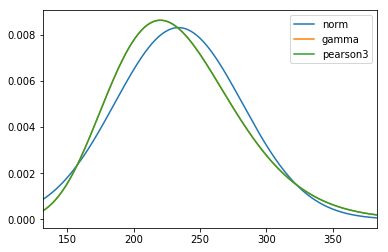

In [48]:
r = best_fit_distribution(d)

In [49]:
r[0]

'pearson3'

In [46]:
r[1]

3.909202696690655

In [17]:
d.mean()

2.1497145

/home/mathsys2/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


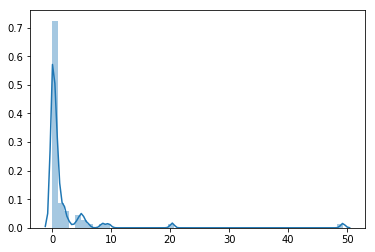

In [10]:
sns.distplot(d);

In [18]:
st.gamma.fit(d)

(0.14385605869304866, -6.4607504678491335e-28, 1.540857927488395)

In [22]:
p[0] * p[2]

4.156691087175467

In [21]:
d.mean()

2.1497145

In [151]:
params = st.norm.fit(d)

In [152]:
params

(14.531022, 32.08461)

In [89]:
normal = []
gamma = []
pearson = []
for i in range(data.shape[1]):
    d = data.iloc[:,i].values
    
    y, x = np.histogram(d, bins=200, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    params = st.norm.fit(d)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))
    normal.append(sse)
    
    params = st.gamma.fit(d)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    pdf = st.gamma.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))
    gamma.append(sse)
    
    params = st.pearson3.fit(d)

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    pdf = st.pearson3.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))
    pearson.append(sse)

In [93]:
studentT_test(normal, gamma)

(0.2741284353178988, 0.39203760625649064, 635, 635)

In [75]:
diff = np.array(gamma) - np.array(normal)

In [127]:
len(diff)

635

In [97]:
diff = np.array(normal) - np.array(gamma)

In [136]:
deg = np.zeros((32,34))

In [137]:
deg[:,:] = np.nan

In [138]:
for i in range(635):
    lon_index = index[i][0]
    lat_index = index[i][1]
    deg[lat_index,lon_index] = diff[i]

Text(0.5,1,'Errors for Exponential Smoothing')

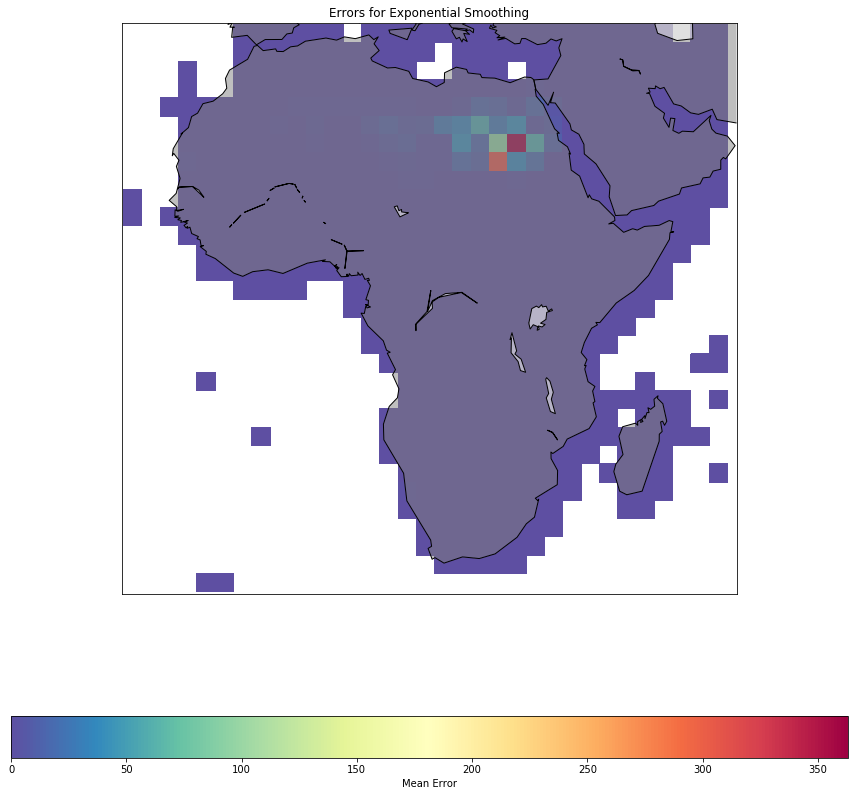

In [140]:
lon1 = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon1, lat)
cs = m.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('Mean Error')
plt.title("Errors for Exponential Smoothing")